# PORT Customer Data Pre-processing

# Background
You have been given a collection of data from a company wishing to process its customer records for business purposes (acw_user_data.csv). The existing systems in-place at the company only export to a CSV file, and this is not in an appropriate format for analysis. You have been given the task of preparing this data for further analyses by your colleagues within the company, including representation changes, filtering, and deriving some new attributes / metrics for them.

## Exercise 1. 

Read in the provided ACW Data using the CSV library. 

##### Code Explaination:

The code below works with the csv module by importing the csv module. The with statement as part of the code ensures that the file is properly closed after the code has run.

The code also provides a csv reader object which specifies comma as the delimiter value. 

The for loop statement allows the code to iterate through each line of the file using the csv reader object.

Finally, the print function displays the entire list for each line in the CSV file.

In [1]:
import csv     # Importing the csv module for data processing 

In [2]:
with open('acw_user_data.csv') as csv_file: # Opening the CSV file 'acw_user_data.csv' in read mode
    csv_reader = csv.reader(csv_file, delimiter = ',')
    for line in csv_reader:  # Loops through each line of the csv file
        print(line) 

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1G

##  Exercise 2. 
As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably:     
 a. Vehicle - consists of make, model, year, and type 
 b. Credit Card - consists of start date, end date, number, security code, and IBAN. 
 c. Address - consists of the main address, city, and postcode. 
For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.

Note: Ensure that the values read in are appropriately cast to their respective types.

##### Code Explaination:

Using the with statement as described in the preceding code, the following code opens the csv file.

Here, a variable line count is set to 0 by the line count. The line number presently being read from the CSV file will be recorded in this variable.

The CSV reader object generated in the preceding step is used to create another loop that iterates through each line of the CSV file, this time determining whether the current line is the file's first line (i.e., the header row). This loop sets a line number to line count, a header value to heading, then iterates through each element in the header row.

The print statement embeds an f string which formats the output by printing the line number (line_count) and it's associated header value (heading) for each header element. 

In [3]:
# viewing the index and columns in the csv file
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0 
    
    # Loop through each line in the CSV file
    for line in csv_reader: 
        if line_count == 0: # If it's the first line (header row), loop through each element in the row and print the index and value
            for line_count, heading in enumerate(line):
                print(f'{line_count}: {heading}') 

0: Address Street
1: Address City
2: Address Postcode
3: Age (Years)
4: Distance Commuted to Work (miles)
5: Employer Company
6: Credit Card Start Date
7: Credit Card Expiry Date
8: Credit Card Number
9: Credit Card CVV
10: Dependants
11: First Name
12: Bank IBAN
13: Last Name
14: Marital Status
15: Yearly Pension (GBP)
16: Retired
17: Yearly Salary (GBP)
18: Sex
19: Vehicle Make
20: Vehicle Model
21: Vehicle Year
22: Vehicle Type


##### Code Explaination:

The code below uses the with statement from the Python csv module to create nested structures from flat structures in a CSV (Comma Separated Values) file called "acw user data.csv," as described in the preceding explanations.

Line count is once more initialised and set to 0. The line number presently being read from the CSV file will be recorded in this variable.

Also, a blank list called user data is made, and it will eventually be used to contain nested dictionaries for each user's information.

Using the CSV reader object made in the previous step, a for loop is formed that iterates through each line of the CSV file. The current line is checked to see if it is the first line of the CSV file because the count is set up to begin in line 0. (i.e., the header row). If so, the code moves on to the next loop iteration.

The code creates nested dictionaries for the user's address, vehicle, and credit card information if the current line is not the first line of the CSV file. The remaining lines in the CSV file are handled in the following manner by the else statement:

    address = generates a dictionary containing "street," "city," and "postcode" as its keys. The first three items of the current line in the CSV file are used to determine the appropriate values.

    vehicle = generates a dictionary containing the keys "make," "model," "year," and "type". The 20th, 21st, 22nd, and 23rd elements of the current line in the CSV file are used to determine the matching values.

    credit card = generates the dictionary credit card with the keys "start date," "end date," "number," "cvv," and "iban." The 7th, 8th, 9th, 10th, and 13th elements of the current line in the CSV file are used to determine the corresponding values.

    details =  houses a nested dictionary for the 3 other nested dictionaries as well as all other user details.
    
The user data list has now been updated with the nested dictionary from details. Each user's information will be represented as a nested dictionary in the user data list when the for loop's execution is complete, along with nested dictionaries for the user's address, vehicle, and credit card information.

In [4]:
# Converting flat structures in the csv file to nested structures

with open('acw_user_data.csv') as csv_file: # Open the CSV file in read mode and create a csv reader object
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    # Initialize a line counter variable and a list to store user data
    line_count = 0
    user_data = []
    
    # Loop through each line in the CSV file
    for line in csv_reader:
        
        # If it's the first line (header row), skip it
        if line_count == 0:
            line_count += 1
        
        # Otherwise, create nested dictionaries for the user's address, vehicle, and credit card details
        else:            
            address = {                                      
                "street": line[0],
                "city": line[1],
                "postcode": line[2]
                }
            vehicle = {
                "make": line[19],
                "model": line[20],
                "year": (line[21]),
                "type": line[22]
                }
            credit_card = {
                "start_date": line[6],
                "end_date": line[7],
                "number": line[8],
                "cvv": line[9],
                "iban": line[12]
                }
        
        # Create a nested dictionary for the entire user's details, including the previously created nested dictionaries.
            details = {
                "first_name": line[11],
                "second_name": line[13],
                "age": int(line[3]),
                "sex": line[18],
                "retired": line[16],
                "marital_status": line[14],
                "dependants": line[10],
                "salary": int(line[17]),
                "pension": int(line[15]),
                "company": line[5],
                "commute_distance": float(line[4]),
                "Vehicle": vehicle,
                "Credit Card": credit_card,
                "Address": address
                }           
            # Add the user's details dictionary to the user_data list
            user_data.append(details)

In [5]:
user_data

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': 'True',
  'marital_status': 'married or civil partner',
  'dependants': '3',
  'salary': 72838,
  'pension': 7257,
  'company': 'N/A',
  'commute_distance': 0.0,
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'type': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': '676373692463',
   'cvv': '875',
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': 'False',
  'marital_status': 'married or civil partner',
  'dependants': '1',
  'salary': 54016,
  'pension': 0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'type': 'Coupe'},
  'Credit Card': {'start_date': '08/1

## Exercise 3. 
The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered. 
a. Print a list where all such error corrections take place. E.g. Problematic rows for dependants: [16, 58, 80, 98] 

##### Code Explaination:

The following code reads the "acw user data.csv" CSV file and looks for rows where the "Dependants" column value is null or contains just whitespace. Whenever such a row is discovered, the code adds the row index to a list called "problematic rows" and replaces any empty or whitespace entries with the numeric value 0. The list of row indices for problematic rows is then printed by the code.

Note: This code only looks for problematic rows and saves the row indices of those rows in a list without changing the original CSV file in any way.

In [6]:
# Finding problematic rows in Dependant column

# Create an empty list to store the row indices of problematic rows
problematic_rows = []

with open('acw_user_data.csv') as csv_file: # Create a CSV reader object and specify the delimiter
    csv_reader = csv.reader(csv_file, delimiter=',')

    # Loop through each row in the CSV file, using an enumerator to keep track of the row index
    for i, row in enumerate(csv_reader):
        
        # Check if the value in the "Dependants" column is empty or contains whitespace
        if row[10] == "" or row[10] == " " :
            row[10] = 0 # Replaces the empty or whitespace entries with 0
            problematic_rows.append(i) # Adds the row index to the list of problematic rows
print(f"Problematic rows for dependants: {problematic_rows}")  # Print the list of row indices for problematic rows

Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## Exercise 4.

Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person. 

##### Code Explaination:

The code below uses the open function to create a new file called "processed.json" in write mode with the mode argument set to write - "w". The user data contents are then written to the file in the JSON data format using the json.dump() function. The user data list is the first parameter to the json.dump() function, and the second parameter is the file object to which the data will be written (in this case, the outfile object).

A new file called "processed.json" will be generated in the same directory as the Python script and once this code executes, it will include the user data list's contents in JSON format.

In [7]:
import json # Imports the json module

In [8]:
# 4. Write all records to a processed.json file in the JSON data format.

# Create a new file named "processed.json" in write mode

with open('processed.json', 'w') as outfile:
    json.dump(user_data, outfile) #  Write the contents of the "user_data" list to the file using the JSON format

## Exercise 5.

You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format. 

##### Code Explaination:

The code below generates two new json files called "employed.json" and "retired.json" depending on whether the "retired" column in the csv file is set to "false" or "true," respectively.

here, the ".lower" technique is used to convert all values in the "retired" column to lowercase for simple manipulation, making it simpler to choose clients who are either employed or retired.


In [9]:
# 5. Write retired and employed customers to two separate JSON files.

# Creates a new json file named "retired.json" that contains customer data for those who have the "retired" field set to "true"

retired_custs = [line for line in user_data if line['retired'].lower() == 'true']
with open('retired.json', 'w') as r_file:
    json.dump(retired_custs, r_file)

    
# Create a new json file of dictionaries saved as "employed.json" that contains customer data for those who have the "retired" field set to "false"    
employed_custs = [line for line in user_data if line['retired'].lower() == 'false']
with open('employed.json', 'w') as e_file:
    json.dump(employed_custs, e_file)
    
# ".lower" is used here to change all values in the retired column to lowercases for easy manipulation     
    

## Exercise 6.
The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.  

##### Code Explaination:

The code below creates a function called credit card problem that examines credit card date problems by splitting the start date and end date fields into month and year using the / as separator, computing the difference in years and months between the dates, and determining whether the time between the start date and end date is longer than 10 years and one month.

The function has also been adjusted to handle ValueError, KeyError, and TypeError exceptions that are raised when the start date or end date fields are not formatted according to expectations. This is accomplished by enclosing the code that splits the dates in a try-except block and returning False if an exception is raised.

Afterwards, the code creates a list of customers with credit card issues using list comprehensions and writes the list to a JSON file saved as remove_ccard.json using the json.dump() method.

In [10]:
# Creates a function to check for credit card date issues
def credit_card_problem(line):
    try:
        # Split the start_date and end_date fields to month and year using '/'
        start_month, start_year = line['Credit Card']['start_date'].split('/')
        end_month, end_year = line['Credit Card']['end_date'].split('/')

        # Calculates the difference in years and months between the dates
        diff_years = int(end_year) - int(start_year)
        diff_months = int(end_month) - int(start_month)

        # Accounts for cases where the end date is in a previous year
        if diff_months < 0:
            diff_years -= 1
            diff_months += 12

        # Returns True if the duration between start and end date is greater than 10 years and 1 month
        return diff_years > 10 or (diff_years == 10 and diff_months > 0)

    except (ValueError, KeyError, TypeError):
        # Handles the exception if the start_date or end_date fields are not in the expected format
        return False

# Creates a list of customers with credit card issues using list comprehensions
credit_card_issues = [line for line in user_data if credit_card_problem(line)]

# Writes the list to a json file saved as remove_ccard.json

with open('remove_ccard.json', 'w') as remove_file:
    json.dump(credit_card_issues, remove_file)


## Exercise 7.
You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:

 a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.
     i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary.
     
 b. Sort these records by that new metric, in ascending order.
 
 c. Store the output file out as a JSON format, for a commute.json file.


##### Code Explaination:

This code below reads the data from the "processed.json" and calculates a new attribute named "salary_commuted" for each record in the file based on the values in the "commute_distance" and "salary" attributes. The calculation is computed as follows; if the commute distance is 1 mile or less, the salary_commuted value is set equal to the salary value. If the commute distance is greater than 1 mile, the salary_commuted value is set equal to the ratio of the salary value and the commute distance.

After the calculation is done, the code sorts the records in the userdata list based on the salary_commuted attribute in ascending order using a lambda function. The sorted data is then written to a new JSON file named "commute.json".

In [11]:
# Load the data from processed.json
with open('processed.json', 'r') as manifest:
    userdata = json.load(manifest)

# Calculate the Salary_Commute attribute by iterating through userdata
for user in userdata:
    miles_commuted = user['commute_distance']
    salary = user['salary']
    if miles_commuted <= 1:
        salary_commute = salary
    else:
        salary_commute = salary / miles_commuted
    user['salary_commuted'] = salary_commute

# Sort the records by Salary_Commute in ascending order using lambda
sorted_data = sorted(userdata, key=lambda x: x['salary_commuted'])

# Write the sorted data to commute.json
with open('commute.json', 'w') as c_file:
    json.dump(sorted_data, c_file)

# Data Visualisation
Using Pandas and Seaborn
Your client wishes to understand the data they have on their customers a bit more by use of visualisations. With use of Pandas and Seaborn read in the original CSV file provided with the assignment.

In [12]:
import pandas as pd #Imports panda module
import seaborn as sns #Imports seaborn module

## Exercise 1.

Obtain the Data Series for Salary, and Age, and calculate the following: 

 a. Mean Salary
 
 b. Median Age 

##### Code Explaination:

The codes below reads the CSV file named "acw_user_data.csv" using pandas, and assigns it to a variable called data_frame. It then displays the first two rows of the dataframe using the head() function.

Next, the code assigns the values in the "Yearly Salary (GBP)" column to a variable called salary. It then calculates the mean of the salary data series using the mean() function and prints it. The f-string is used to format the output by inserting the mean salary value into the string.

Similarly, the code assigns the values in the "Age (Years)" column to a variable called age. It then calculates the median of the age data series using the median() function and prints it. The f-string is used to format the output by inserting the median age value into the string.

In [13]:
# Reads an original copy of the acw_user_data

data_frame = pd.read_csv('acw_user_data.csv') 

# Displays the first two rows of the dataframe
data_frame.head(2) 

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe


In [14]:
#Assigns salary to the column Yearly Salary (GBP)

salary = data_frame['Yearly Salary (GBP)']
salary 

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [15]:
#finding the mean value of the salary data series

print(salary.mean())
print( f"The mean salary is: {salary.mean()}")

57814.078
The mean salary is: 57814.078


In [16]:
#Assigns age to the column Age (Years)

age = data_frame['Age (Years)'] 
age 

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [17]:
#finding the median value of the age data series

print(age.median())
print( f"The median age is: {age.median()}")

54.0
The median age is: 54.0


## Exercise 2.
Perform univariate plots of the following data attributes:

 a. Age, calculating how many bins would be required for a bin_width of 5.
 
 b. Dependents, fixing data errors with seaborn itself.
 
 c. Age (of default bins), conditioned on Marital Status

##### Code Explaination:

The code is performing data visualization using seaborn library in Python.

a. The first part of the code calculates the number of bins required for the univariate plot (histogram) of the Age column from the dataframe, assuming a bin width of 5. It then creates the univariate plot using seaborn's displot function with 15 bins and a red edge color.

b. The next part of the code checks for null or NaN values in the 'Dependants' column, and then fills any null value with 0. It then creates a univariate plot of the 'Dependants' column using seaborn's displot function with an alpha value of 0.2.

c. Finally, the code creates a conditioned univariate plot of 'Age' (of default bins) conditioned on 'Marital Status' using seaborn's displot function.

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Calcultaes the bin size using bin_width of 5 univariate plot for age with bin width = 5


n_bins = (data_frame['Age (Years)'].max() - data_frame['Age (Years)'].min()) / 5
n_bins
round(n_bins, 0)

#Reference: 
#GeeksforGeeks (2021) Bin Size in Matplotlib Histogram. 
#Available online: https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/ [Accessed 25/3/2023]


15.0

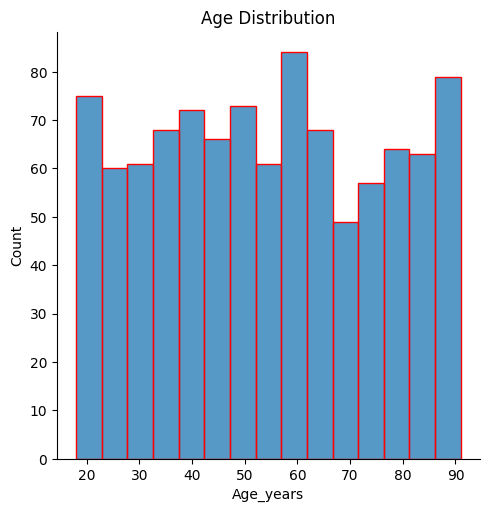

In [22]:
# a. Creates a univariate plot(histogram) using the Age column from the dataframe. 

age_uni_plot = sns.displot(data = data_frame, x = 'Age (Years)', bins = 15, edgecolor = 'r')

plt.title('Age Distribution')
plt.xlabel('Age_years')
plt.ylabel('Count')

age_uni_plot

In [23]:
# b. Dependents, fixing data errors with seaborn itself.

data_frame['Dependants'].isnull().any() #shows the presence of a null or nan value in the dependants column

True

In [24]:
data_frame['Dependants'].unique() #shows the unique contents of the dependant columns with the presence of nan

array([ 3.,  1.,  2.,  4., nan,  5.])

In [25]:
# fixes the null issue in the dependant column with 0(assuming it was left blank because they had no dependants).
data_frame['Dependants'].fillna(value = 0, inplace = True) 

In [26]:
#shows the presence of a null or nan value in the dependants column

data_frame['Dependants'].isnull().any() 

False

In [27]:
#shows the unique contents of the dependant columns after fixing errors

data_frame['Dependants'].unique() 

array([3., 1., 2., 4., 0., 5.])

Text(5.069444444444445, 0.5, 'Count')

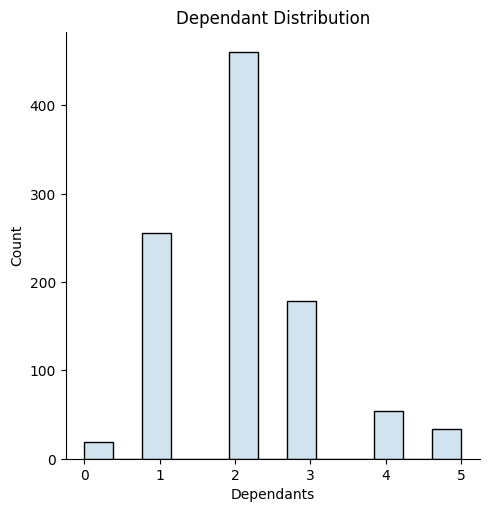

In [28]:
# a. Creates a univariate plot(histogram) using the Dependant column from the dataframe. 

depend_uni_plot = sns.displot(data = data_frame, x = 'Dependants', alpha = 0.2) 

plt.title('Dependant Distribution')
plt.xlabel('Dependants')
plt.ylabel('Count')

Text(33.55958333333333, 0.5, 'Count')

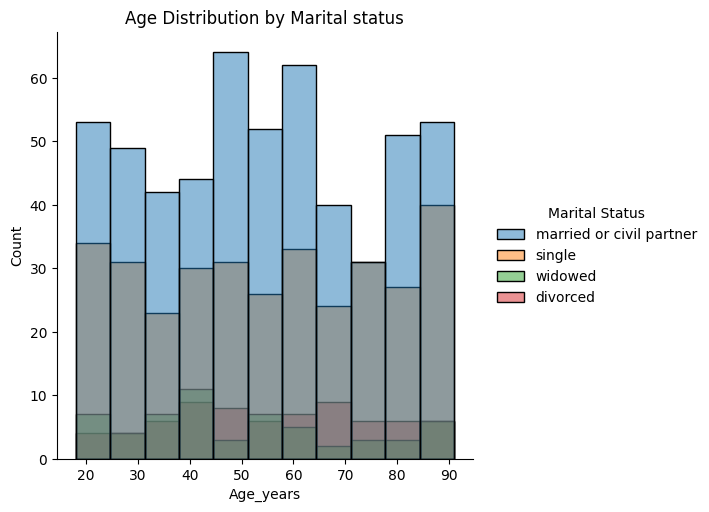

In [29]:
# c. Age (of default bins), conditioned on Marital Status

age_uni_cond_plot = sns.displot(data = data_frame, x = 'Age (Years)', hue ='Marital Status')

plt.title('Age Distribution by Marital status')
plt.xlabel('Age_years')
plt.ylabel('Count')

## Exercise 3.
Perform multivariate plots with the following data attributes:

 a. Commuted distance against salary.

 b. Age against Salary

 c. Age against Salary conditioned by Dependants

##### Code Explaination:
These codes are creating scatterplots using the Seaborn library.

The first line data_frame.head(0) is just used to display the column names of the dataframe in order to easily reference the variable names for each column in the subsequent plots.

a.The first code creates a scatterplot of Distance Commuted to Work (miles) against Yearly Salary (GBP). The plot is stored in the variable comm_by_sal_plot.

The second code creates a scatterplot Age (Years) against Yearly Salary (GBP) with color set as yellow 'y'. The plot is stored in the variable age_by_sal_plot.

The last code creates a scatterplot of Age (Years) against Yearly Salary (GBP), but this time the plot is conditioned on the Dependants column using the hue argument. This means that each unique value in the Dependants column will be represented by a different color. The palette argument is used to set the color scheme, in this case "Set1". The plot is stored in the variable age_by_sal_cond_plot.

In [30]:
data_frame.head(0) # displays the column names to aid in plotting graphs

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type


Text(0, 0.5, 'Yearly Salary (GBP)')

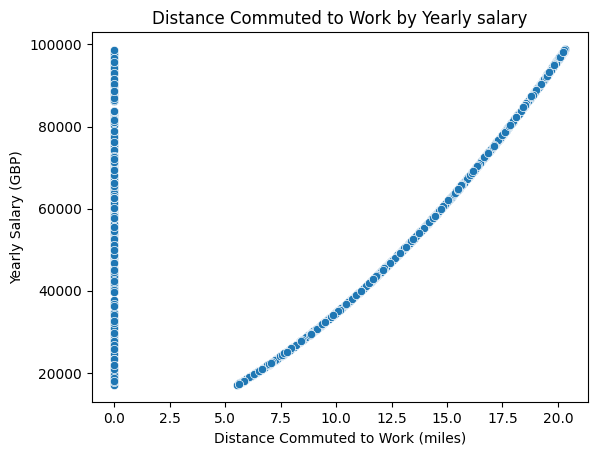

In [31]:
# a. plots a multivariate plot(scatterplot) for Commuted distance against salary.

comm_by_sal_plot = sns.scatterplot(data = data_frame, x ='Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')

plt.title('Distance Commuted to Work by Yearly salary')
plt.xlabel('Distance Commuted to Work (miles)')
plt.ylabel('Yearly Salary (GBP)')

Text(0, 0.5, 'Yearly Salary (GBP)')

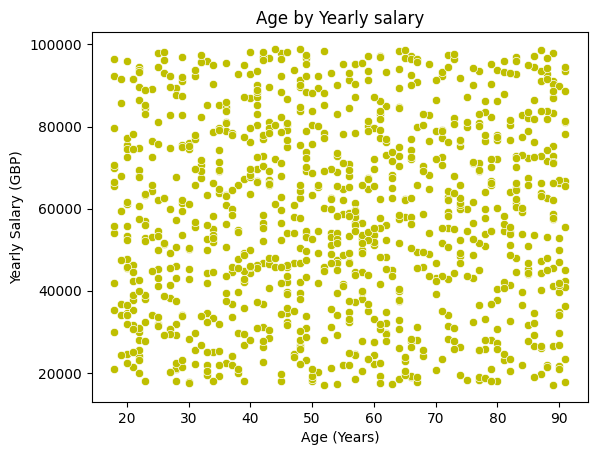

In [32]:
# b. plots a multivariate plot(scatterplot) for Age against salary with marker color set to yellow

age_by_sal_plot = sns.scatterplot(data = data_frame, x ='Age (Years)', y = 'Yearly Salary (GBP)', color = 'y')
plt.title('Age by Yearly salary')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (GBP)')

Text(0, 0.5, 'Yearly Salary (GBP)')

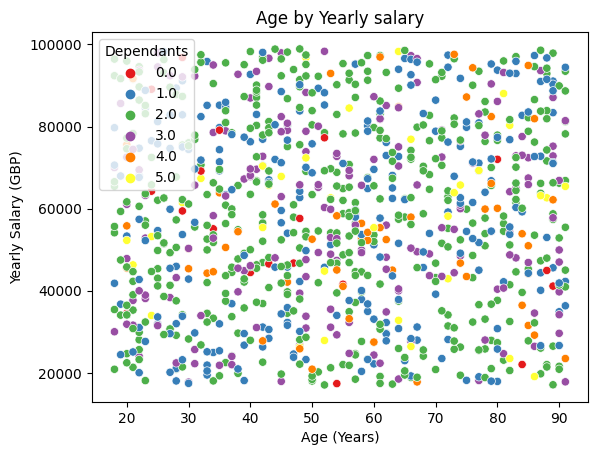

In [33]:
#c. plots a multivariate plot(scatterplot) for Age against Salary conditioned by Dependants with a palette style

age_by_sal_cond_plot = sns.scatterplot(data = data_frame, x ='Age (Years)', y = 'Yearly Salary (GBP)', hue = 'Dependants', palette="Set1" )

plt.title('Age by Yearly salary')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (GBP)')

#Reference: 
#Seaborn (2022) Choosing color palettes. 
#Available online: #https://seaborn.pydata.org/tutorial/color_palettes.html#choosing-color-palettes [Accessed 25/3/2023]


# Exercise 4. 
Your client would like the ability to save the plots which you have produced. 
Provide a Notebook cell which can do this.

##### Code Explaination:

The code below saves the created plots as PNG image files in the current working directory. It uses the savefig() method to save the figure object obtained from each Seaborn plot. get_figure() method is used to extract the figure object from each Seaborn plot, and then savefig() method is used to save it as a PNG image file in the current working directory.

In [34]:
# Saves each univariate plots as PNG image files in the current working directory
age_uni_plot.savefig('./age_uni_plot.png')
depend_uni_plot.savefig('./depend_uni_plot.png')
age_uni_cond_plot.savefig('./age_uni_cond_plot.png')


# Saves each multivariate plots as PNG image files in the current working directory
# ''.get_figure()' is used to get the figure object from the seaborn plot so that it can be saved using the savefig() method.
comm_by_sal_plot.get_figure().savefig('./comm_by_sal_plot.png')
age_by_sal_plot.get_figure().savefig('./age_by_sal_plot.png')
age_by_sal_cond_plot.get_figure().savefig('./age_by_sal_cond_plot.png')

